In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Ashishkushwaha022/Machine_Learning_Regression/master/Advertising.csv",index_col=None)

# Problem Statement

Sales in thousand of unit is given to us a function of advertising budgets for TV, Radio, Newspaper. Here each companies data are present ,how much did they spend on advertisment through different mediums(TV, radio, Newspaper) and what is the sales after the advertisment. 

<H4>Your role as a data scientist is as follows:</H4>

>1. Find the function that the given input budgets for TV , radio and newspaper predicts the output sales.

>2. WHich media contributes maximum to the sales

>3. Visualize the relationship between the features and the response using scatter plot

In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## Explore the Data or EDA 

In [4]:
#column unamed not required
print(df.columns)
df.drop(columns=['Unnamed: 0'],inplace=True)

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')


In [5]:
df.shape

(200, 4)

In [6]:
df.describe()
#25 % as first quartile.

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


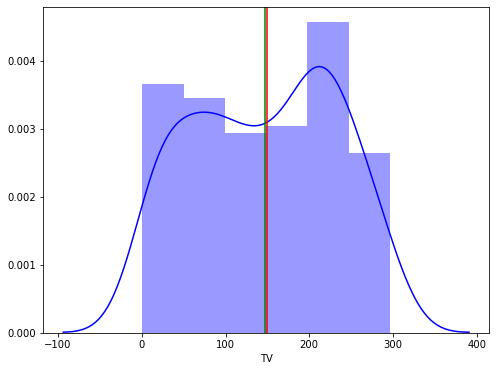

In [7]:
#Check the distribution of the column 
# Distribution of data for TV
plt.figure(figsize=(8, 6))
sns.distplot(df['TV'],color='b')
plt.axvline(df['TV'].mean(),color='g')
plt.axvline(df['TV'].median(),color='r')

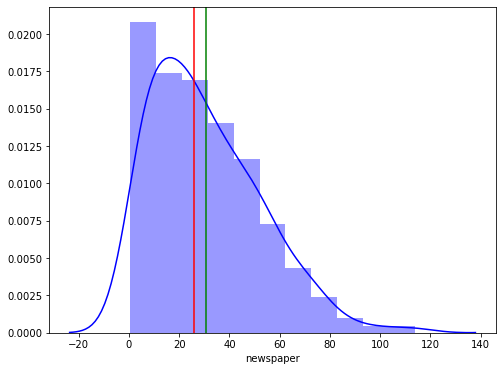

In [8]:
# Distribution of data for newspaper
plt.figure(figsize=(8, 6))
sns.distplot(df['newspaper'],color='b')
plt.axvline(df['newspaper'].mean(),color='g')
plt.axvline(df['newspaper'].median(),color='r')

If the distribution of the "newspaper" column is right-skewed, indicating a long tail on the right side of the distribution, you may consider applying a transformation to make the data more symmetric. Some common transformations that can be applied to right-skewed data include logarithmic transformation, square root transformation, or Box-Cox transformation.

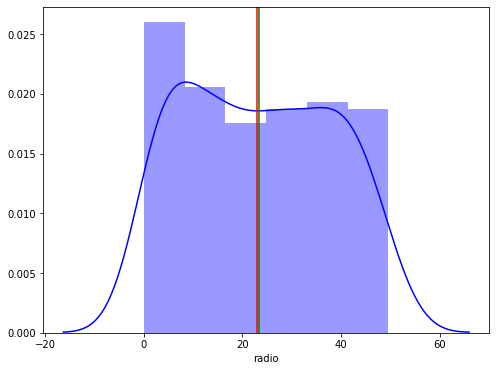

In [9]:
## Distribution of data for radio
plt.figure(figsize=(8, 6))
sns.distplot(df['radio'],color='b')
plt.axvline(df['radio'].mean(),color='g')
plt.axvline(df['radio'].median(),color='r')

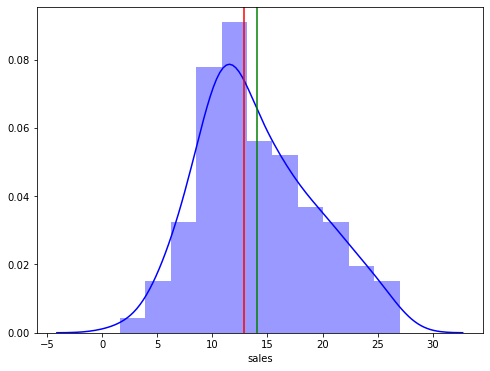

In [10]:
# Distribution of data for newspaper
plt.figure(figsize=(8, 6))
sns.distplot(df['sales'],color='b')
plt.axvline(df['sales'].mean(),color='g')
plt.axvline(df['sales'].median(),color='r')

Findings from above distribution list.

>1. TV , radio , sales a re normally distributed.
>2. Spending on newspaper is right skewed i.e - mostly companies are not spending more than 40k for advertisment

## Relation between the dependent variable and independent Variable.

>1. Dependent variable -Sales
>2. Independent Variable -TV Radio newspaper

## Univariate graphs focus on visualizing and understanding individual variables, while bivariate graphs show the relationship between two variables. Here are some examples of common univariate and bivariate graphs:

Univariate Graphs:

>1. Histogram: A histogram represents the distribution of a single variable by dividing it into bins and displaying the frequency or density of observations within each bin.
>2. Kernel Density Plot: Similar to a histogram, a kernel density plot displays the distribution of a variable but in a smoothed continuous form.
>3. Box Plot: A box plot summarizes the distribution of a variable by displaying the median, quartiles, and any outliers.
>4. Bar Plot: A bar plot displays the frequency or proportion of different categories or groups within a single variable.
>5. Line Plot: A line plot shows the changes in a variable's value over time or any other ordered variable.

Bivariate Graphs:

>1. Scatter Plot: A scatter plot displays the relationship between two continuous variables by plotting data points as individual dots on a 2D plane.
>2. Line Plot: A line plot can also be used to show the relationship between two variables over time or any other ordered variable.
>3.Heatmap: A heatmap visualizes the relationship between two variables by using color intensity to represent the strength or magnitude of their association.
>4. Pair Plot: A pair plot is a matrix of scatter plots that displays the pairwise relationships between multiple variables in a dataset.
>5. Bar Plot: A grouped or stacked bar plot can be used to compare the values of two variables across different categories or groups.

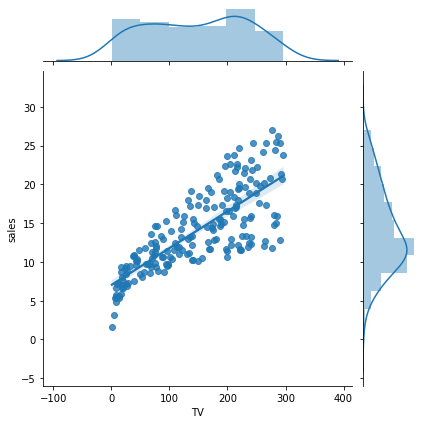

In [11]:
sns.jointplot('TV','sales',data=df,kind='reg')


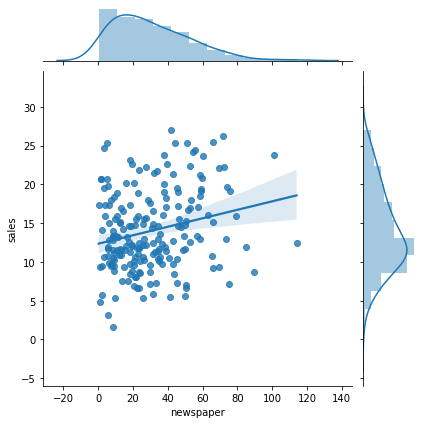

In [12]:
sns.jointplot('newspaper','sales',data=df,kind='reg')


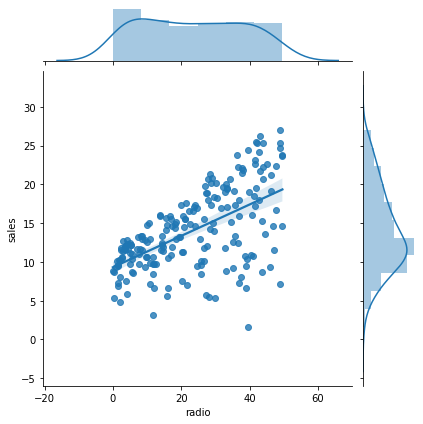

In [13]:
sns.jointplot('radio','sales',data=df,kind='reg')


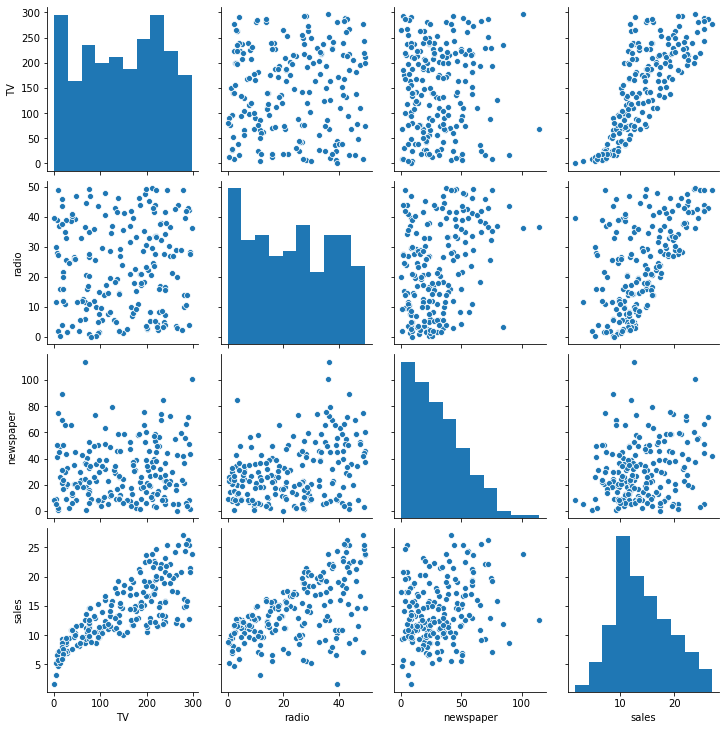

In [14]:
sns.pairplot(data=df)

In machine learning, it is generally desirable to have a strong correlation between the independent variables (features) and the dependent variable (target), while minimizing or avoiding correlations between the independent variables themselves. This can help ensure that the independent variables provide meaningful and distinct information for predicting the dependent variable.

### Question - Why we are finding the relationship between the variables?


Answer : Because we know while using the algorithm Linear regression ,we will be using the equation 
Y=mx+c

### where how is x usefull to predict y ?
So this is the reason we do EDA and find the relationship between the variables

So, when using the linear regression , we should know what column to be used to predict.

Y = $m_{1}x_{1} + m_{2}x_{2} + m_{3}x_{3} + c$


<Figure size 1440x720 with 0 Axes>

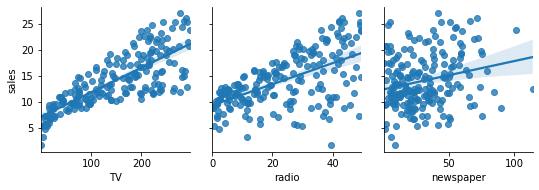

In [15]:
#we can plot all graphs together
plt.figure(figsize=(20,10))
sns.pairplot(data=df,x_vars=['TV','radio','newspaper'],y_vars='sales',kind='reg')
plt.show()

__Multicollinearity__

In ML, we always want the independent variable and Dependent variable to have a high positive or high negative correlation.Also, we dont want any correlation ie.0 between two IV's, else it leads to the issue of multicollinearity.When we find such an issue ,we elliminate all the correlated IV's except one to resolve the issue.

__Multicollinearity__ makes it hard to interpret of model and also creates an overfitting problem. 

As this is having limited columns ,we are going for correlation ,But when the columns are more in that case use a heat map.



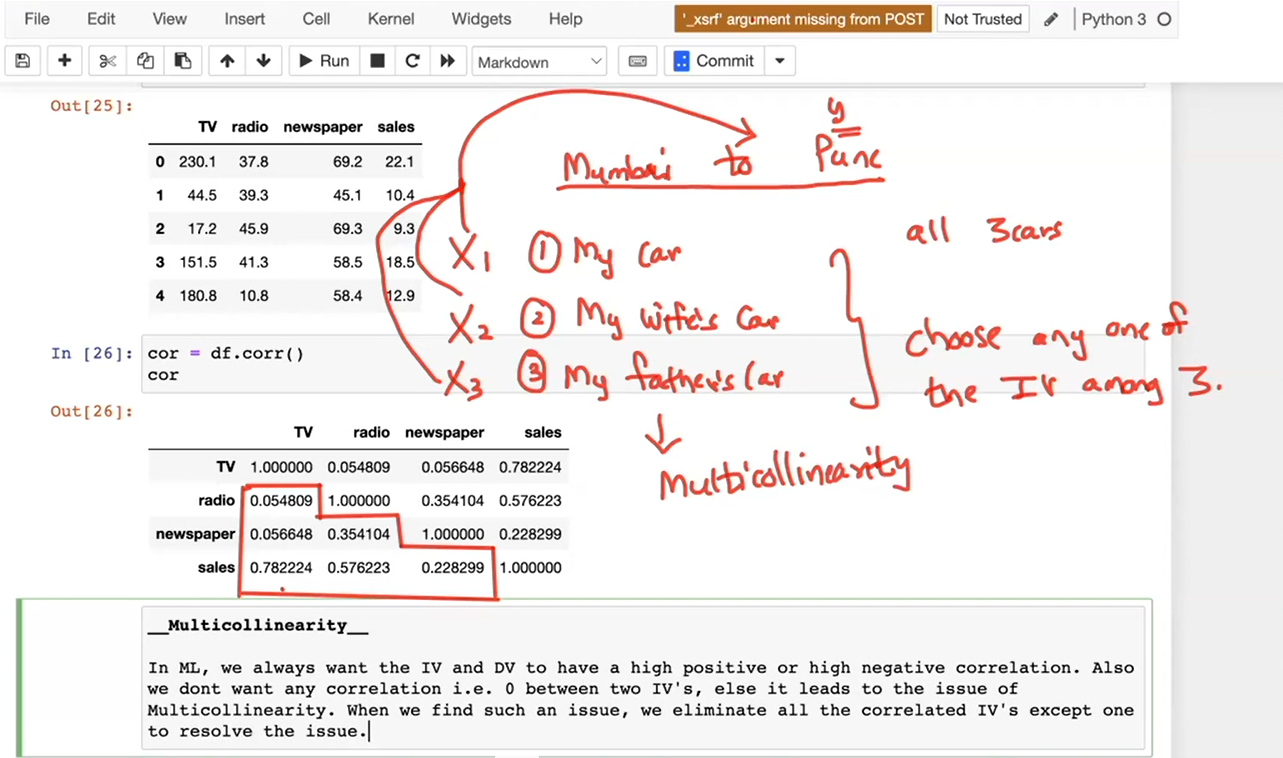


__Multicollinearity__

Methods to check :

>1.find correlation , and  find max correlation between independent varaible and dependent variable

>2.Use the Variance Inflation Factor(VIF) for each independent variable. 

__correlation__ :
Variables X and Y (each with measured data) are said to be posi‐
tively correlated if high values of X go with high values of Y, and low values of X go
with low values of Y. If high values of X go with low values of Y, and vice versa, the
variables are negatively correlated.

The correlation coefficient always lies between +1
(perfect positive correlation) and –1 (perfect negative correlation); 0 indicates no
correlation.

    

In [16]:
corr=df.corr()
corr

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


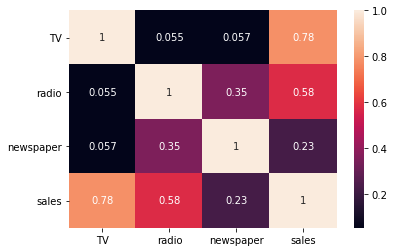

In [17]:
sns.heatmap(corr,annot=True)
# To check multicolinearity , we check the values which are closer to 0 which means , no correlation.

Learn - variance inflatiion factor

## Check Outliers 

>1. First method -- use boxplot
>2. Identify the column having outliers


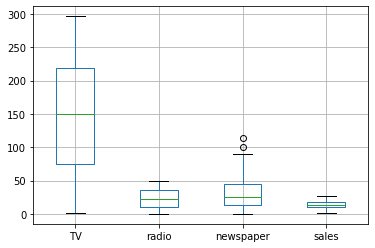

In [18]:
df.boxplot()

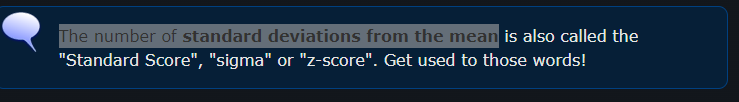

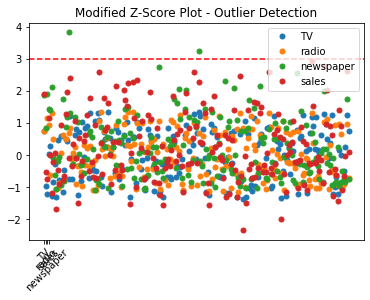

In [19]:
# Calculate modified z-scores for each column
z_scores = pd.DataFrame()
for column in df.columns:
    z_score = 0.6745 * (df[column] - df[column].median()) / np.median(np.abs(df[column] - df[column].median()))
    z_scores[column] = z_score

# Create modified z-score plot
fig, ax = plt.subplots()
ax.set_title('Modified Z-Score Plot - Outlier Detection')

# Plot modified z-scores for each column
z_scores.plot(ax=ax, marker='o', linestyle='', ms=5)

# Add a threshold line to identify outliers (e.g., z-score > 3)
threshold = 3
ax.axhline(y=threshold, color='red', linestyle='--')

# Set x-axis labels
ax.set_xticks(range(len(df.columns)))
ax.set_xticklabels(df.columns)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [20]:
# Calculate z-scores
z_scores = (df['TV'] - np.mean(df['TV'])) / np.std(df['TV'])

# Define threshold for outliers (e.g., z-score > 3)
outlier_threshold = 3

# Find outliers
outliers = df[np.abs(z_scores) > outlier_threshold]

# Print outliers
print(z_score.min())
print("Outliers:")
print(outliers)

-2.345184615384615
Outliers:
Empty DataFrame
Columns: [TV, radio, newspaper, sales]
Index: []


In [21]:
z_scores = (df['newspaper'] - np.mean(df['newspaper'])) / np.std(df['newspaper'])

In [22]:
z_scores.max()

3.841170715099271

## Linear regression 


In [23]:
X=df[['TV', 'radio', 'newspaper']]
y=df.sales

In [24]:
from sklearn.model_selection import train_test_split=train_test_split(X,y,test_size=.20,train_size=.80,shuffle=True,random_state=0)

In [25]:
print(y_train)

134    10.8
66      9.5
26     15.0
113    15.9
168    17.1
       ... 
67     13.4
192     5.9
117     9.4
47     23.2
172     7.6
Name: sales, Length: 160, dtype: float64


In [1]:
## Preprocessing - Normalization(Data is normally distributed) using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

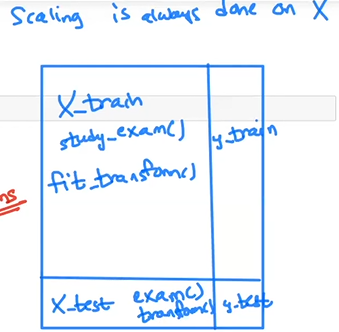


for X_train ,we prepare it for exam(ie. study--fit_transform),for x_test ,we give exam(ie -transform)

In [27]:
X_train.columns

Index(['TV', 'radio', 'newspaper'], dtype='object')

In [28]:
X_train[['TV', 'radio', 'newspaper']]=mms.fit_transform(X_train)

In [29]:
X_test[['TV', 'radio', 'newspaper']]=mms.transform(X_test)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [32]:
y_pred=lr.predict(X_test)

In [33]:
y_pred

array([10.05739563,  7.4522807 ,  7.0197076 , 24.08029725, 12.01786259,
        6.53793858, 12.78286918, 15.10974587, 10.76974013, 16.34357951,
       22.88297477,  9.12924467, 10.46455672, 15.48743552, 11.58555633,
       12.17296914, 18.76551502, 10.78318566, 15.90515992, 17.30651279,
       24.06692057,  9.59834224, 15.13512211, 12.38591525,  5.71360885,
       15.24749314, 12.29402334, 20.9421167 , 13.40991558,  9.04348832,
       12.89239415, 21.40272028, 18.13802209, 21.17320803,  6.56974433,
        6.14114206,  7.89018394, 13.01541434, 14.68953791,  6.18835143])

In [34]:
y_test

18     11.3
170     8.4
107     8.7
98     25.4
177    11.7
182     8.7
5       7.2
146    13.2
12      9.2
152    16.6
61     24.2
125    10.6
180    10.5
154    15.6
80     11.8
7      13.2
33     17.4
130     1.6
37     14.7
74     17.0
183    26.2
145    10.3
45     14.9
159    12.9
60      8.1
123    15.2
179    12.6
185    22.6
122    11.6
44      8.5
16     12.5
55     23.7
150    16.1
111    21.8
22      5.6
189     6.7
129     9.7
4      12.9
83     13.6
106     7.2
Name: sales, dtype: float64

In [44]:
lr.coef_
#'TV', 'radio', 'newspaper' By looking into the coeficient ,we can find that there is no sales generated via newspaper

array([13.03190908,  9.74625289, -0.2781464 ])

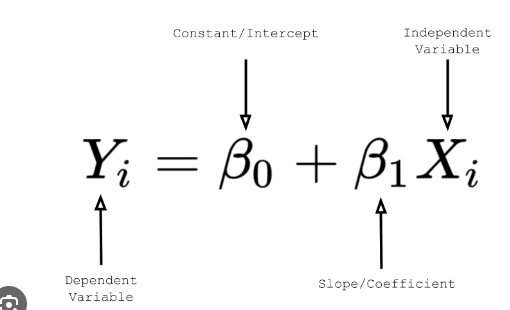

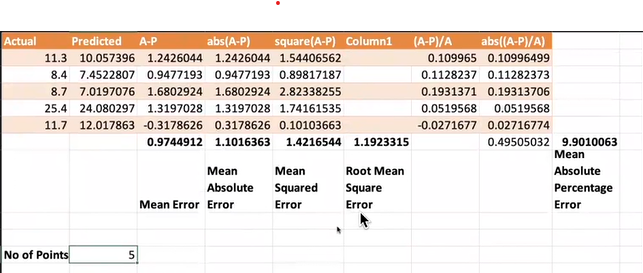

In [35]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

print("R-squared:", r2)

#The output will be the R-squared value, which ranges from 0 to 1. A value closer to 1 indicates a better fit of the regression 
#model to the data.

R-squared: 0.8601145185017869


In [36]:

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [37]:
mean_absolute_error(y_test,y_pred)
np.mean(np.abs(y_test-y_pred))

1.3617813502090277

In [38]:
mean_squared_error=mean_squared_error(y_test,y_pred)
np.mean((y_test-y_pred)**2)

4.402118291449684

In [39]:
mean_squared_error

4.402118291449682